# Pandas Lab 5 - Pivoting and plotting with Pandas

## Objectives:
* Continue getting comfortable with Pandas
* Practice exploration of data using pivoting, plotting, and dates

## Data files:
Download the release_dates.csv file from the Files/Datasets folder on Canvas and put the file in the same directory as this .ipynb file.  You should also move or copy the cast.csv and titles.csv files from Lab 3.1 into the same directory.


## Submission Instructions:
Please turn in this Jupyter notebook file (.ipynb format) on Canvas before you leave the classroom. Try to get through as much as you can.

## Note: you only need to complete the <font color="red">Q1, Q2, Q3, and Q4</font> cells for this lab but the other cells may be helpful. 

___

## We want you to feel comfortable with the contents of this notebook for the midterm exam.  Please use lab time, Piazza or our office hours for help.  We want to help you learn this stuff!

___

Let's start with some of the usual import statements...

In [3]:
# load a few libraries we'll need

%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample

In [4]:
# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Pivots/Stack/Unstack Intro
based on example from: 
http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [5]:
from collections import OrderedDict
from pandas import DataFrame

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)

In [6]:
# make a table of items (rows) and costs (USD) 
# for each in gold and bronze

![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple1.png "pivots")

In [7]:
# Access the USD cost of Item0 for Gold customers

In [8]:
# pivot by multiple columns, I want USD and EU prices

In [9]:
# Access the USD cost of Item0 for Gold customers

![pivot 2](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple_error.png "pivots")

In [10]:
# What happens if there is a collision? see the problem
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)
p = metal.pivot(index='Item', columns='CType', values='USD')

ValueError: Index contains duplicate entries, cannot reshape

## pivot_tables is your friend
![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_table_simple1.png "pivots")

In [ ]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
metal = DataFrame(table)

In [ ]:
# pivots are a specific form of stack/unstack

![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/stack-unstack1.png "pivots")

## Your turn...

In [12]:
# to start let's make a fake dataset: sales of fruit across US states.
# Don't worry about the details here, but basically we'll pretend
# this string is a CSV file and use the standard loading ops
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.DataFrame.from_csv(TESTDATA, index_col=None)

## refresher and pivots (we'll come back to IMDB)

In [13]:
fruit

State    Retailer   Fruit  Sales
0    MI     Walmart   Apple    100
1    MI  Wholefoods   Apple    150
2    MI      Kroger  Orange    180
3    CA     Walmart   Apple    220
4    CA  Wholefoods   Apple    180
5    CA     Safeway   Apple    220
6    CA     Safeway  Orange    110
7    NY     Walmart   Apple     90
8    NY     Walmart  Orange     80
9    NY  Wholefoods  Orange    120

In [14]:
# What are the total sales for each state?
fruit.groupby('State').sum()

Sales
State       
CA       730
MI       430
NY       290

In [37]:
# What is the total sales for each state for each fruit?
fruitPivoted1 = fruit.pivot_table(index = 'State', columns = 'Fruit', values = 'Sales', aggfunc = np.sum)
fruitPivoted1

Fruit  Apple  Orange
State               
CA       620     110
MI       250     180
NY        90     200

In [38]:
# Which state has the maximum total sales?
fruitPivoted1['Total'] = fruitPivoted1['Apple'] + fruitPivoted1['Orange']
fruitPivoted1.loc[fruitPivoted1['Total'].idxmax()]

Fruit
Apple     620
Orange    110
Total     730
Name: CA, dtype: int64

In [39]:
# Which state has the maximum total sales for apples?
fruitPivoted1.loc[fruitPivoted1['Apple'].idxmax()]

Fruit
Apple     620
Orange    110
Total     730
Name: CA, dtype: int64

## <font color="red">Q1: Which state has the biggest difference of sales between apples and oranges? (i.e., abs(#apples-#oranges)</font>

In [40]:
# Which state has the biggest difference of sales between apples and oranges?
# (i.e., abs(#apples-#oranges)
fruitPivoted1['Diff'] = abs(fruitPivoted1['Apple'] - fruitPivoted1['Orange'])
fruitPivoted1.loc[fruitPivoted1['Diff'].idxmax()]

Fruit
Apple     620
Orange    110
Total     730
Diff      510
Name: CA, dtype: int64

In [46]:
# Which 2 retailers have the highest total sales in the east coast?
fruitPivoted2 = fruit.pivot_table(index = 'Retailer', columns = 'State', values = 'Sales')
fruitPivoted2.nlargest(2, 'NY')

State          CA     MI     NY
Retailer                       
Wholefoods  180.0  150.0  120.0
Walmart     220.0  100.0   85.0

In [50]:
# What are the 2 retailers where their customers really hate some fruit (in the Eastern Time Zone)?
# min(#apples, #oranges)
fruitPivoted2.nsmallest(2, ['NY', 'MI'])

State          CA     MI     NY
Retailer                       
Walmart     220.0  100.0   85.0
Wholefoods  180.0  150.0  120.0

## Back to Hollywood -- Stack/unsatck

In [69]:
# load up the tables we need

titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
# titles table contains a list of movie titles and release year

cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
# cast table contains the following columns 
# title = name of movie
# year = year of movie
# name = name of actor/actress
# type = actor or actress
# character = character name
# n = number in the credits (NaN when not available)
stackedCast = cast.stack()
stackedCast.head(20)

0  title              Closet Monster
   year                         2015
   name                     Buffy #1
   type                        actor
   character                 Buffy 4
1  title             Suuri illusioni
   year                         1985
   name                       Homo $
   type                        actor
   character                  Guests
   n                              22
2  title         Battle of the Sexes
   year                         2017
   name                      $hutter
   type                        actor
   character         Bobby Riggs Fan
   n                              10
3  title        Secret in Their Eyes
   year                         2015
   name                      $hutter
dtype: object

In [70]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?
cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960)].type.value_counts()

actor      6616
actress    2965
Name: type, dtype: int64

In [ ]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

In [ ]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

In [ ]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

In [ ]:
# Plot the fraction of roles that have been ’actor’ roles
# each year in the hitsory of film.

## <font color="red">Q2: Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank’s roles were ’actor’ roles for each year in the history of film.</font>

In [53]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank’s roles
# were ’actor’ roles for each year in the history of film.
uniqueYears = titles.year.sort_values().unique()
actorArray = np.transpose([[None]*len(uniqueYears) for _ in range(1,4)])
actorDF = pd.DataFrame(data=actorArray, index=uniqueYears, columns=range(1,4))

for year in uniqueYears:
    for n_val in range(1,4):
        totalRoles = len(cast[(cast.n == n_val) & (cast.year == year)])
        totalActor = len(cast[(cast.n == n_val) & (cast.year == year) & (cast.type == 'actor')])
        if totalRoles != 0:
            actorDF.set_value(year, n_val, (totalActor/totalRoles))

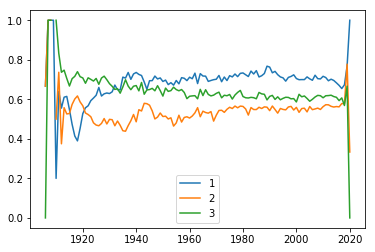

In [56]:
import matplotlib.pyplot as plt
for n_val in range(1,4):
    plt.plot(uniqueYears, actorDF[n_val])

plt.legend()

![sample of plot](sample.png "actor fraction for top n billing")

## working with multiple tables 
### and a bit about dates

In [71]:
# load up another table we need
release_dates = pd.DataFrame.from_csv('release_dates.csv', index_col=None,parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

# table release_dates contains multiple lines for a movie
# title - movie title
# year - year released
# country - country
# date - release date for country

title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                 #Beings  2015      Romania 2015-01-29
2               #Declimax  2018  Netherlands 2018-01-21
3  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21
4                 #Horror  2015          USA 2015-11-20

In [74]:
# by country, what were the release dates of Hamlet 1911
release_dates[(release_dates.title == 'Hamlet') & (release_dates.year == 1911)]

title  year  country       date
138945  Hamlet  1911  Denmark 1911-02-27
138946  Hamlet  1911       UK 1911-03-18
138947  Hamlet  1911      USA 1911-04-15

<Container object of 11 artists>

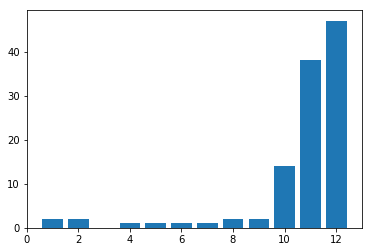

In [125]:
# Hypothesis: Christmas movies are released near Christmas
# In what month were movies with "Christmas" in their 
# title tend to be released in the USA?

# extract relevant movies
movies = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]

# get value counts for each month
monthCounts = movies.date.dt.month.value_counts().sort_index()

# bar chart the month counts
plt.bar(monthCounts.index, monthCounts.values)

<Container object of 7 artists>

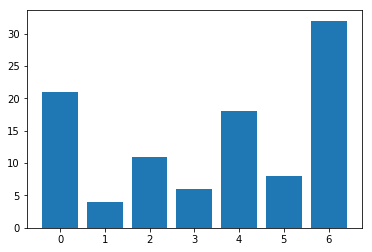

In [119]:
# Hypothesis: Romance movies are released on different
# days than Action movies

# What day of week were "Romance" titled movies 
# released in the USA

# extract relevant movie
movies2 = release_dates[(release_dates.title.str.contains('Romance')) & (release_dates.country == 'USA')]

# get value counts for each day of week
dayCounts = movies2.date.dt.dayofweek.value_counts().sort_index()

# bar chart the month counts
plt.bar(dayCounts.index, dayCounts.values)

<Container object of 7 artists>

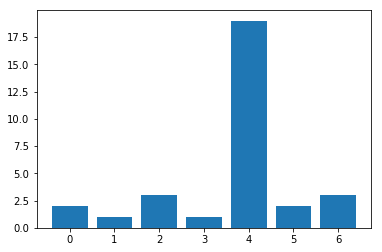

In [126]:
# What day of week were "Action" titled movies 
# released in the USA

# extract relevant movie
movies2 = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]

# get value counts for each day of week
dayCounts = movies2.date.dt.dayofweek.value_counts().sort_index()

# bar chart the month counts
plt.bar(dayCounts.index, dayCounts.values)

In [148]:
# when did Ellen Page’s movies come out 
# (Month/Day/Year)?

#ellenPage = release_dates[release_dates.title.str.contains('Ellen Page')]
ellenPageMovies = cast[cast.name == 'Ellen Page'].title
moviesDates = release_dates.loc[release_dates['title'].isin(ellenPageMovies.values)].date


## <font color="red">Q3: On which date was each Judi Dench movie from the 1990s released in the USA?</font>

In [ ]:
# On which date was each Judi Dench movie 
# from the 1990s released in the USA?

## <font color="red">Q4: Please provide the code for the star wars table described in the next cell (either pivot or stack/unstack based)</font>

In [ ]:
# I want a table
# all star war movies (rows) and columns are the release dates in each country (country name starts with U)
# you can do this with stack/unstack or pivot

![sample of table](sample2.png "release dates")

In [ ]:
# now do it with pivot

In [ ]:
# who does Cary Grant costar with the most?

In [ ]:
## A few other important things

In [ ]:
# In each given year, how many movies has George Clooney
# starred in (total up to that year)?

In [ ]:
# how do I create columns?

In [ ]:
# how do I modify string columns?

In [ ]:
# what's the most common first character of movie titles per year?